![](https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/pandas_interview.gif?raw=true)

<img src="https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/contact_me.png?raw=true" width="70%" height="70%">

## Q1: How to create new columns derived from existing columns in Pandas?

Answer:

- We create a new column by assigning the output to the DataFrame with a new column name in between the [].
- Let's say we want to create a new column 'C' whose values are the multiplication of column 'B' with column 'A'. The operation will be easy to implement and will be element-wise, so there's no need to loop over rows.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create example data
df = pd.DataFrame({
  "A": [420, 380, 390],
  "B": [50, 40, 45]
})

df["C"] = df["A"] * df["B"]

- Also other mathematical operators (+, -, \*, /) or logical operators (<, >, =,…) work element-wise. But if we need more advanced logic, we can use arbitrary Python code via apply().
- Depending on the case, we can use rename with a dictionary or function to rename row labels or column names according to the problem.

## Q2: A column in a df has boolean True/False values, but for further calculations, we need 1/0 representation. How would you transform it?

Answer:

A succinct way to convert a single column of boolean values to a column of integers 1 or 0 is:

In [3]:
df = pd.DataFrame({'col1':[True,False,True]})

In [4]:
df["col1"] = df["col1"].astype(int)

In [5]:
df

,col1
0,1
1,0
2,1


## Q3: Describe how you will get the names of columns of a DataFrame in Pandas

```python
for col in data.columns:
    print(col)
```

## Q4: How are iloc() and loc() different?

Answer:

`DataFrame.iloc` is a method used to retrieve data from a Data frame, and it is an integer position-based locator (from 0 to length-1 of the axis), but may also be used with a boolean array. It takes input as integer, arrays of integers, a slice object, boolean array and functions.

`DataFrame.loc` gets rows (and/or columns) with particular labels. It takes input as a single label, list of arrays and slice objects with labels.

## Q5: How can you sort the DataFrame?

Answer:

The function used for sorting in pandas is called `DataFrame.sort_values()`. It is used to sort a DataFrame by its column or row values. The function comes with a lot of parameters, but the most important ones to consider for sort are:

- by: The optional by parameter is used to specify the column/row(s) which are used to determine the sorted order.
- axis: specifies whether sort for row (0) or columns (1),
- ascending: specifies whether to sort the dataframe in ascending or descending order. The default value is ascending. To sort in descending order, we need to specify ascending=False.

In [6]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})

In [7]:
df.sort_values(by=['col1'])

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [8]:
df.sort_values(by=['col1', 'col2'])

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [9]:
df.sort_values(by='col1', ascending=False)

,col1,col2,col3,col4
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B
3,NaN,8,4,D


In [10]:
df.sort_values(by='col4', key = lambda x: x.str.lower())

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


## Q6: How can you find the row for which the value of a specific column is max or min?

In [11]:
df = pd.DataFrame(np.random.randn(5,3),columns=['A','B','C'])
df

,A,B,C
0,-0.993896,-0.681394,-0.442788
1,-0.626608,-1.279883,-0.060241
2,-0.211157,-0.830927,1.377133
3,0.050205,2.099027,-1.132400
4,1.374441,-0.330935,0.357686


In [12]:
df['A'].idxmax()

4

In [13]:
df['A'].idxmin()

0

## Q7: How can you get a list of Pandas DataFrame columns based on data type?

Answer:

We can use the function `select_dtypes()` to select columns by dtype and then use the columns attribute to save the selected columns into a list.

In [14]:
df = pd.DataFrame({'NAME': list('abcdef'),
        'On_Time': [True, False] * 3,
        'On_Budget': 1. * 3})
df

,NAME,On_Time,On_Budget
0,a,True,3.0
1,b,False,3.0
2,c,True,3.0
3,d,False,3.0
4,e,True,3.0
5,f,False,3.0


In [15]:
df.select_dtypes('bool')

,On_Time
0,True
1,False
2,True
3,False
4,True
5,False


In [16]:
df.select_dtypes(['object','bool'])

,NAME,On_Time
0,a,True
1,b,False
2,c,True
3,d,False
4,e,True
5,f,False


## Q8: How does the groupby() method works in Pandas?

Answer:
    
- In the first stage of the process, data contained in a pandas object, whether a Series, DataFrame, or otherwise, is split into groups based on one or more keys that we provide.

- The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1).

- Once this is done, a function is applied to each group, producing a new value. Finally, the results of all those function applications are combined into a result object. The form of the resulting object will usually depend on what's being done to the data.

- In the figure below, this process is illustrated for a simple group aggregation.

![](https://user-images.githubusercontent.com/53355899/144045594-1a5c3f78-4250-4ed8-9de3-ca3689fe08bf.png)

## Q9: How to split a string column in a DataFrame into two columns?

Problem:

I have a dataframe with one (string) column and I'd like to split it into two (string) columns, with one column header as code and the other location.

Answer
You can use `str.split` by whitespace (default separator) and parameter `expand=True` for DataFrame with assign to new columns:

In [17]:
df = pd.DataFrame({'row': ['00000 UNITED STATES', '01000 ALABAMA', 
                           '01001 Autauga County, AL', '01003 Baldwin County, AL', 
                           '01005 Barbour County, AL']})
df

,row
0,00000 UNITED STATES
1,01000 ALABAMA
2,"01001 Autauga County, AL"
3,"01003 Baldwin County, AL"
4,"01005 Barbour County, AL"


In [18]:
df[['code','location']] = df['row'].str.split(n=1, expand=True)

In [19]:
df

,row,code,location
0,00000 UNITED STATES,00000,UNITED STATES
1,01000 ALABAMA,01000,ALABAMA
2,"01001 Autauga County, AL",01001,"Autauga County, AL"
3,"01003 Baldwin County, AL",01003,"Baldwin County, AL"
4,"01005 Barbour County, AL",01005,"Barbour County, AL"


## Q10: How to check whether a Pandas DataFrame is empty?

You can use the attribute df.empty to check whether it's empty or not:

```python
if df.empty:
    print('DataFrame is empty!')
```

## Q11: How would you iterate over rows in a DataFrame in Pandas?

Answer:

`DataFrame.iterrows` is a generator which yields both the index and row (as a Series):

In [20]:
df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
df

,c1,c2
0,10,100
1,11,110
2,12,120


In [21]:
for index, row in df.iterrows():
    print(row['c1'], row['c2'])

10 100
11 110
12 120


## Q12: What are the operations that Pandas Groupby method is based on ?

Answer:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

## Q13: What does describe() percentiles values tell about our data?

Answer:

The percentiles describe the distribution of your data: 50 should be a value that describes the middle of the data, also known as median. 25, 75 is the border of the upper/lower quarter of the data. With this can get an idea of how skew our data is.

If the mean is higher than the median, the data is right skewed.

![](https://www.scribbr.nl/wp-content/uploads/2020/09/iqr_skewed_boxplot.png)

## Q14: Why do should make a copy of a DataFrame in Pandas?

Answer:

In general, it is safer to work on copies than on original DataFrames, except when you know that you won't be needing the original anymore and want to proceed with the manipulated version.

This is because in Pandas, indexing a DataFrame returns a reference to the initial DataFrame. Thus, **changing the subset will change the initial DataFrame**. Thus, **you'd want to use the copy if you want to make sure the initial DataFrame shouldn't change**.

Normally, you would still have some use for the original data frame to compare with the manipulated version, etc. Therefore, depending on the case it's a good practice to work on copies and merge at the end.

## Q15: Compare the Pandas methods: map(), applymap(), apply()

Answer:

- The `map()` method is an **elementwise** method for **only Pandas Series**, it maps values of Series according to input correspondence.

    - It accepts dicts, Series, or callable. Values that are not found in the dict are converted to NaN

- The `applymap()` method is an **elementwise** function for **only DataFrames**, it applies a function that accepts and returns a scalar to every element of a DataFrame.

- The `apply()` method also works elementwise, as it applies a function along input axis of DataFrame. It is suited to more complex operations and aggregation.

In [22]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
print(s)

0       cat
1       dog
2       NaN
3    rabbit
dtype: object


In [23]:
s.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [24]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
print(df)

       0      1
0  1.000  2.120
1  3.356  4.567


In [25]:
df.applymap(lambda x: round(x**2,2))

,0,1
0,1.00,4.49
1,11.26,20.86


In [26]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


## Q16: Describe how you can combine (merge) data on Common Columns or Indices?

Answer:

- Using `.merge()` method which merges DataFrame or named Series objects with a database-style join. You have inner, left, right and outer merge operation.

- By default, the Pandas merge operation acts with an **“inner” merge**. An inner merge, keeps only the common values in both the left and right dataframes for the result.

- Left merge, keeps every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, it adds empty / NaN values in the result.

- Right merge, keeps every row in the right dataframe. Where there are missing values of the “on” variable in the left column, it adds empty / NaN values in the result.

- A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere

In [27]:
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [28]:
df1

,a,b
0,foo,1
1,bar,2


In [29]:
df2

,a,c
0,foo,3
1,baz,4


In [30]:
df1.merge(df2, how='inner', on='a')

,a,b,c
0,foo,1,3


In [31]:
df1.merge(df2, how='left', on='a')

,a,b,c
0,foo,1,3.0
1,bar,2,NaN


## Q17: Find a way to binary encode multi-valued categorical variables from a Pandas dataframe


Problem:

Suppose we have the following dataframe with multiple values for a certain column:

```
   categories
0 - ["A", "B"]
1 - ["B", "C", "D"]
2 - ["B", "D"]
```

How can you get a table like this?

```
   "A"  "B"  "C"  "D"
0 - 1    1    0    0
1 - 0    1    1    1
2 - 0    1    0    1
```

In [32]:
data = pd.DataFrame.from_records(
    [[0, 'A'], [0, 'B'], [1, 'B'], [1, 'C'], [1, 'D'], [2, 'B'], [2, 'D']],
    columns=['number_label', 'category'])

In [33]:
data

,number_label,category
0,0,A
1,0,B
2,1,B
3,1,C
4,1,D
5,2,B
6,2,D


Answer:

If [0, 1, 2] are numerical labels and is not the index, then pandas.DataFrame.pivot_table works:

In [34]:
data.pivot_table(index=['number_label'], 
                 columns=['category'], 
                 aggfunc=[len], 
                 fill_value=0)

len         
category       A  B  C  D
number_label             
0              1  1  0  0
1              0  1  1  1
2              0  1  0  1

In [35]:
import collections
data2 = pd.DataFrame.from_dict(
    {'categories': {0: ['A', 'B'], 1: ['B', 'C', 'D'], 2:['B', 'D']}})

In [36]:
data2

,categories
0,"[A, B]"
1,"[B, C, D]"
2,"[B, D]"


In [37]:
data3 = data2['categories'].apply(collections.Counter)
data3 = pd.DataFrame.from_records(data3).fillna(value=0)
data3.applymap(lambda x: int(x))

,A,B,C,D
0,1,1,0,0
1,0,1,1,1
2,0,1,0,1


## Q18: Group DataFrame Rows into a List

Problem:

You are given the Pandas DataFrame shown below, your task is to group the DataFrame rows into a list, and return a final DataFrame.

In [38]:
df = pd.DataFrame( {'a':['A','A','B','B','B','C'], 'b':[1,2,5,5,4,6]})
df

,a,b
0,A,1
1,A,2
2,B,5
3,B,5
4,B,4
5,C,6


Output of the new column

```
# Row 1, has value of [1,2]
# Row 2, has value of [5, 5, 4]
# Row 3, has value of [6]
```

In [39]:
df1 = df.pivot_table(index='a',  
                 aggfunc=[list], 
                 fill_value=0)

In [40]:
df1.columns = ['new']

In [41]:
df1.reset_index(inplace=True)

In [42]:
df1

,a,new
0,A,"[1, 2]"
1,B,"[5, 5, 4]"
2,C,[6]


In [43]:
df2 = df.groupby('a')['b'].apply(list).reset_index(name='new')

In [44]:
df2

,a,new
0,A,"[1, 2]"
1,B,"[5, 5, 4]"
2,C,[6]


## Q19: How can I achieve the equivalents of SQL's IN and NOT IN in Pandas?

Answer:
- Use pd.Series.isin.
- For IN use: `something.isin(somewhere)`

In [45]:
df = pd.DataFrame(
{
    'A':[1,2,3,4,5],
    'B':[2,3,4,5,6],
    'C':[2,4,6,8,10]
}
)
df

,A,B,C
0,1,2,2
1,2,3,4
2,3,4,6
3,4,5,8
4,5,6,10


In [46]:
df[df['A'].isin([3, 6])]

,A,B,C
2,3,4,6


- For NOT IN: `~something.isin(somewhere)`

In [47]:
df[-df["A"].isin([3, 6])]

,A,B,C
0,1,2,2
1,2,3,4
3,4,5,8
4,5,6,10


In [48]:
df[~df["A"].isin([3, 6])]

,A,B,C
0,1,2,2
1,2,3,4
3,4,5,8
4,5,6,10


In [49]:
df[df["A"].isin([3, 6]) == False]

,A,B,C
0,1,2,2
1,2,3,4
3,4,5,8
4,5,6,10


In [50]:
df[np.logical_not(df["A"].isin([3, 6]))]

,A,B,C
0,1,2,2
1,2,3,4
3,4,5,8
4,5,6,10


- For alternative readable solution use .query() method:

In [51]:
lst = [3,6]
df.query("A in @lst")

,A,B,C
2,3,4,6


In [52]:
df.query("A not in @lst")

,A,B,C
0,1,2,2
1,2,3,4
3,4,5,8
4,5,6,10


## Q20: How do you split a DataFrame according to a boolean criterion?

Answer:

We can create a mask to separate the dataframe and then use the inverse operator (~) to take the complement of the mask.

In [53]:
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})

In [54]:
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


In [55]:
m = df['A'] != 'foo'

In [56]:
a, b = df[m], df[~m]

In [57]:
a

,A,B,C,D
1,bar,one,1,2
3,bar,three,3,6
5,bar,two,5,10


In [58]:
b

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


## Q21: How will you write DataFrame to PostgreSQL table?

Answer:

Using Pandas `to_sql` module, you can create an SQLAlchemy engine, and write records stored in a DataFrame to a SQL database.

```python
from sqlalchemy import create_engine
engine = create_engine('your_connection_string')
df.to_sql('table_name', engine)
```

## Q22: How would you convert continuous values into discrete values in Pandas?

Answer:

Depending on the problem, continuous values can be discretized using the cut() or qcut() function:

- 等距分箱：`cut()` bins the data based on values. We use it when we need to segment and sort data values into bins evenly spaced. cut will choose the bins to be evenly spaced according to the values themselves and not the frequency of those values. For example, cut could convert ages to groups of age ranges.

- 等频分箱：`qcut()` bins the data based on sample quantiles. We use it when we want to have the same number of records in each bin or simply study the data by quantiles. For example, if in a data we have 30 records, and we want to compute the quintiles, qcut() will divide the data such that we have 6 records in each bin.

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. There are several different terms for binning including bucketing, discrete binning, discretization or quantization. Pandas supports these approaches using the cut and qcut functions. This article will briefly describe why you may want to bin your data and how to use the pandas functions to convert continuous data to a set of discrete buckets. Like many pandas functions, cut and qcut may seem simple but there is a lot of capability packed into those functions. Even for more experience users, I think you will learn a couple of tricks that will be useful for your own analysis.

In [59]:
df = pd.DataFrame({
  "col_a": np.random.randint(1, 50, size=50),
  "col_b": np.random.randint(20, 100, size=50),
  "col_c": np.random.random(size=50).round(2)
})
df.head()

,col_a,col_b,col_c
0,24,60,0.34
1,39,99,0.21
2,49,77,0.77
3,32,27,0.99
4,32,24,0.21


In [60]:
df["col_a_binned"] = pd.cut(df.col_a, bins=5)
df.col_a_binned.value_counts()

(29.8, 39.4]     13
(0.952, 10.6]    12
(10.6, 20.2]     11
(39.4, 49.0]      9
(20.2, 29.8]      5
Name: col_a_binned, dtype: int64

With the cut function, we do not have any control over how many values fall into each bin. We can only specify the bin edges.

This is where we need to learn about the qcut function. It can be used to divide the values into buckets in a way that each bucket contains approximately the same number of values.

In [61]:
pd.qcut(df.col_a, q=4).value_counts()

(25.0, 36.0]     13
(11.5, 25.0]     13
(0.999, 11.5]    13
(36.0, 49.0]     11
Name: col_a, dtype: int64

## Q23: How would you create Test (20%) and Train (80%) Datasets with Pandas?

In [62]:
df = pd.DataFrame({
  "col_a": np.random.randint(1, 50, size=500),
  "col_b": np.random.randint(20, 100, size=500),
  "col_c": np.random.random(size=500).round(2)
})
df.head()

,col_a,col_b,col_c
0,11,95,0.66
1,45,65,0.32
2,43,79,0.06
3,3,23,0.29
4,29,51,0.91


In [63]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [64]:
train

,col_a,col_b,col_c
139,37,77,0.27
35,39,44,0.09
81,25,40,0.47
431,27,36,0.15
378,16,25,0.47
...,...,...,...
146,41,87,0.55
386,6,74,0.58
339,40,73,0.55
56,39,54,0.32


In [65]:
test

,col_a,col_b,col_c
468,17,96,0.45
103,8,30,0.99
333,48,61,0.17
243,36,54,0.12
446,38,34,0.10
...,...,...,...
330,29,61,0.66
281,28,59,0.51
122,23,52,0.67
245,29,49,0.78


## Q24: Is it a good idea to iterate over DataFrame rows in Pandas?

Answer:

**Iteration in Pandas is an anti-pattern** and is something you should only do when you have exhausted every other option. Iterating through pandas objects is generally slow. In many cases, iterating manually over the rows is not needed. You should not use any function with "iter" in its name for more than a few thousand rows or you will have to get used to **a lot of waiting**.

Do you want to print a DataFrame? Use `DataFrame.to_string()`.

Do you want to compute something? In that case, search for methods in this order (list modified from here):

- Vectorization
- Cython routines
- List Comprehensions (vanilla for loop)
- `DataFrame.apply()`: 
    - Reductions that can be performed in Cython
    - Iteration in Python space
- `DataFrame.itertuples()` and `iteritems()`
- `DataFrame.iterrows()`
iterrows and itertuples (both receiving many votes in answers to this question) should be used in very rare circumstances, such as generating row objects/nametuples for sequential processing, which is really the only thing these functions are useful for.

## Q25: Name some type conversion methods in Pandas

Answer:

- `to_numeric()` - provides functionality to safely convert non-numeric types (e.g. strings) to a suitable numeric type.
- `astype()` - convert (almost) any type to (almost) any other type. Also allows you to convert to categorial types (very useful).
- `infer_objects()` - a utility method to convert object columns holding Python objects to a pandas type if possible. It does this by inferring better dtypes for object columns.
- `convert_dtypes()` - convert DataFrame columns to the "best possible" dtype that supports pd.NA (pandas' object to indicate a missing value).


## Q26: Name the advantage of using applymap() vs apply() method

Answer:

- The applymap() method is good for elementwise transformations across multiple rows/columns.

- The apply method is useful for applying any function that cannot be vectorised.

## Q27: Pivot Table Challenge

Problem

I have a pandas dataframe:

In [66]:
df = pd.DataFrame({"Col X": ['class 1', 'class 2', 'class 3', 'class 2'],
                   "Col Y": ['cat 1', 'cat 1', 'cat 2', 'cat 3']})

In [67]:
df

,Col X,Col Y
0,class 1,cat 1
1,class 2,cat 1
2,class 3,cat 2
3,class 2,cat 3


You are required to transform the dataframe into:
```
+------------------------------------------+
|                  cat 1    cat 2    cat 3 |
+------------------------------------------+
|     class 1         1        0        0  |
|     class 2         1        0        1  |
|     class 3         0        1        0  |
+------------------------------------------+
```

Answer:

To provide the required df we use the function `pivot_table` with the parameters `index='Col X'`, `columns='Col Y'` and as aggfunc, `len`:

In [68]:
pd.pivot_table(df, index=['Col X'], columns=['Col Y'], aggfunc=len, fill_value=0)

Col Y,cat 1,cat 2,cat 3
Col X,,,
class 1,1,0,0
class 2,1,0,1
class 3,0,1,0


Another solution is using groupby on 'Col X','Col Y' with unstack over Col Y, then fill NaNs with zeros.

In [69]:
df.groupby(['Col X','Col Y']).size().unstack('Col Y', fill_value=0)

Col Y,cat 1,cat 2,cat 3
Col X,,,
class 1,1,0,0
class 2,1,0,1
class 3,0,1,0


## Q28: What is the difference between join() and merge() in Pandas?

Answer:

merge is a function in the pandas namespace, and it is also available as a DataFrame instance method, with the calling DataFrame being implicitly considered the left object in the join.

The related DataFrame.join method, uses merge internally for the index-on-index and index-on-column(s) joins, but joins on indexes by default rather than trying to join on common columns (the default behavior for merge). If you are joining on index, you may wish to use DataFrame.join to save yourself some typing.

These are the main differences between df.join() and df.merge():

1. lookup on right table: df1.join(df2) always joins via the index of df2, but df1.merge(df2) can join to one or more columns of df2 (default) or to the index of df2 (with right_index=True).
2. lookup on left table: by default, df1.join(df2) uses the index of df1 and df1.merge(df2) uses column(s) of df1. That can be overridden by specifying `df1.join(df2, on=key_or_keys)` or `df1.merge(df2, left_index=True)`.
3. left vs inner join: `df1.join(df2)` does a left join by default (keeps all rows of df1), but df.merge does an inner join by default (returns only matching rows of df1 and df2).

## Q29: What is the difference(s) between merge() and concat() in Pandas?

Answer:

At a high level:

- .concat() simply stacks multiple DataFrame together either vertically, or stitches horizontally after aligning on index
- .merge() first aligns two DataFrame' selected common column(s) or index, and then pick up the remaining columns from the aligned rows of each DataFrame.

More specifically, .concat():

- Is a top-level pandas function
- Combines two or more pandas DataFrame vertically or horizontally
- Aligns only on the index when combining horizontally
- Errors when any of the DataFrame contains a duplicate index.
- Defaults to outer join with the option for inner join

And .merge():

- Exists both as a top-level pandas function and a DataFrame method (as of pandas 1.0)
- Combines exactly two DataFrame horizontally
- Aligns the calling DataFrame's column(s) or index with the other DataFrame's column(s) or index
- Handles duplicate values on the joining columns or index by performing a cartesian product
- Defaults to inner join with options for left, outer, and right

## Q30: What's the difference between at and iat in Pandas?

Answer：

at and iat are functions meant to access a scalar, that is, a single element in the dataframe.

With .at:

- Selection is label based but it only selects a single 'cell' in your DataFrame.
- We can assign new indices and columns.
- To use .at, pass it both a row and column label separated by a comma.

With .iat:

- Selection with .iat is position based but it only selects a single scalar value.
- We can't assign new indices and columns.
- To use iat you must pass it an integer for both the row and column locations.

In [70]:
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
     columns=['A', 'B', 'C'],
     index=['first', 'second', 'third'])

In [71]:
df

,A,B,C
first,0,2,3
second,0,4,1
third,10,20,30


In [72]:
df.at['second','B',]

4

In [73]:
df.iat[1, 1]

4

## Q31: What's the difference between interpolate() and fillna() in Pandas?

Answer:

- `fillna()` fills the NaN values with a given number with which you want to substitute. It gives you an option to fill according to the index of rows of a pd.DataFrame or on the name of the columns in the form of a python dict.

- `interpolate()` it gives you the **flexibility** to fill the missing values with many kinds of interpolations between the values like linear, time, etc (which fillna does not provide).

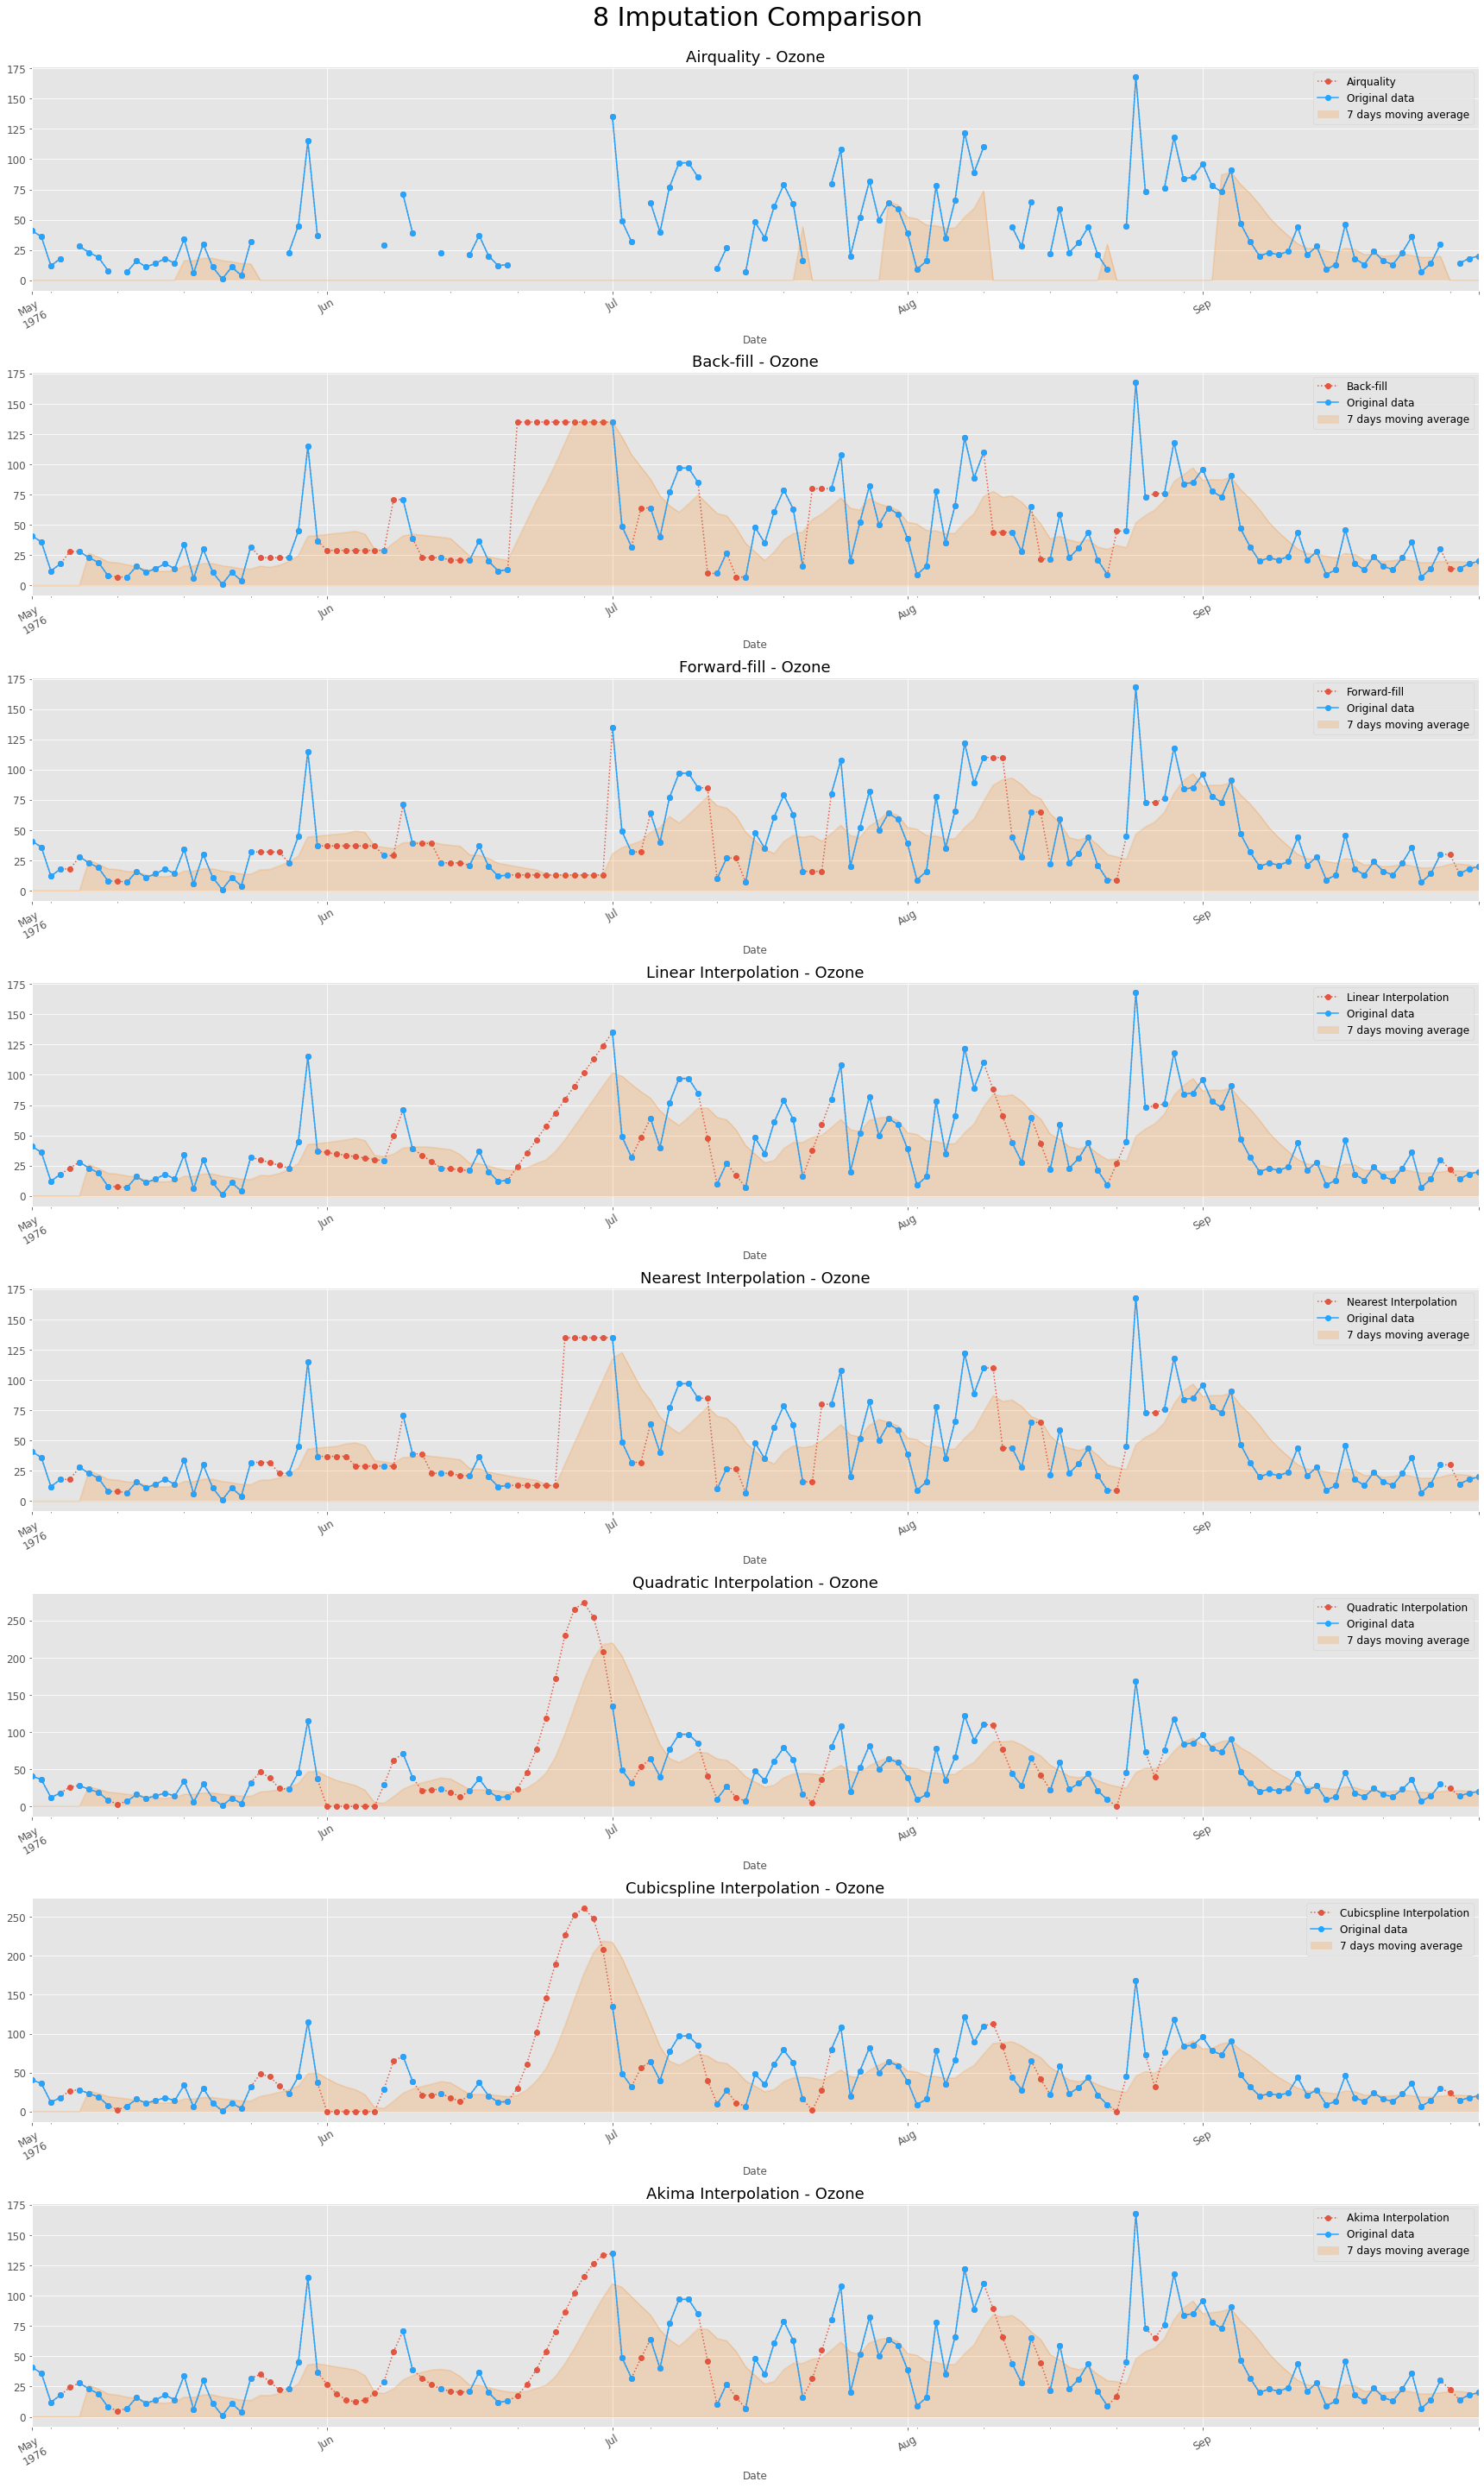

## Q32: What's the difference between pivot_table() and groupby()?

Answer:

Both pivot_table and groupby are used to aggregate your dataframe. The difference is only with regard to the shape of the result.

When using `pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum)` a table is created where:

- a is on the row axis,
- b is on the column axis,
- and the values are the sum of c.

In [74]:
df = pd.DataFrame({"a": [1,2,3,1,2,3], "b":[1,1,1,2,2,2], "c":np.random.rand(6)})
pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum)

c          
b         1         2
a                    
1  0.461396  0.338512
2  0.332223  0.771490
3  0.890433  0.604592

Using groupby:

- The dimensions given are placed into columns.
- The rows are created for each combination of those dimensions.
- To obtain the "equivalent" output as before, we can create a Series of the sum of values c, grouped by all unique combinations of a and b.

In [75]:
df.groupby(['a','b'])['c'].sum()

a  b
1  1    0.461396
   2    0.338512
2  1    0.332223
   2    0.771490
3  1    0.890433
   2    0.604592
Name: c, dtype: float64

A similar usage of groupby is if we omit the ['c']. In this case, it creates a DataFrame of the sums of all remaining columns grouped by unique values of a and b.

In [76]:
df.groupby(["a","b"]).sum()

c
a b          
1 1  0.461396
  2  0.338512
2 1  0.332223
  2  0.771490
3 1  0.890433
  2  0.604592

As we can see, with pivot_table() the output is a **DataFrame**, and is easier to specify the changes, meanwhile with groupby() the output can be a **DataFrame or Series** depending on how we specify the case.

## Q33: When to use merge() over concat() and vice-versa in Pandas?

Answer：

- Consider .concat() first when combining homogeneous DataFrame, while consider .merge() first when combining complementary DataFrame.
- If need to merge vertically, go with .concat(). If need to merge horizontally via columns, go with .merge(), which by default merge on the columns in common.

## Q34: Explain what is Multi-indexing in Pandas?

You use **multi-indexing** to express multi-dimensionality in a data structure of lower dimension.

- a pandas.Series with more than one dimension.
- a pandas.DataFrame with more than two dimensions.

The columns index will be replaced by a columns multiindex, and the multi-indexing is expressed by tuples of related labels.

In [77]:
tuples_from_pairs = [
    ('one', 'X'), ('one', 'Y'),
    ('two', 'X'), ('two', 'Y')]

df = pd.DataFrame(
    {'row': [0, 1, 2],
     'one_X': [1, 2, 3],
     'one_Y': [4, 5, 6],
     'two_X': [10, 20, 30],
     'two-Y': [40, 50, 60]})

# set the index to the 'row' column
df = df.set_index('row')

# create a multi-index object from the tuples
pd.MultiIndex.from_tuples(tuples_from_pairs)

# replace the columns index by a columns multi-index
df.columns = pd.MultiIndex.from_tuples(tuples_from_pairs)

In [78]:
df

one    two    
      X  Y   X   Y
row               
0     1  4  10  40
1     2  5  20  50
2     3  6  30  60

## Q35: How would you deal with large CSV files in Pandas?

Answer:

Pandas is in-memory tool library. So we need to be able to fit your data in memory to use pandas with it. If you come across a large CSV file that you want to process, we have a few options.

- If you can process portions of it at a time, you can read it into **chunks** and process each chunk with the chunksize parameter.
- Alternatively, there are a few hints to help pare down the file size.

    - Use the nrows parameter of read_csv to limit how much data we load to a small sample.
    - After reading in our limtit dataset, we perform data exploration and inspect the data types of each column with the `dtypes` method, then we look for the memory usage of each column with the `.memory_usage` method. With this information, we can have a hint of what columns need to be transformed. For example, if we have a dummy column we convert it in an 8-bit integer with dummy_column.astype(np.int8).
    - To save even more memory, we will want to consider changing object data types to category if they have a reasonably low cardinality.
    - If there are columns that we know we can ignore, we can use the usecols parameter of the read_csv() function to specify the columns we want to load.
    - If we assess that with these transformations the memory usage decreases, we can then repeat this process with the rest of the data as chunks.

## Q36: Suppose df2 is a subset of df1. How can you get the rows of df1 which are not in df2?

In [79]:
df1 = pd.DataFrame(data = {'col1' : [1, 2, 3, 4, 5, 3], 
                           'col2' : [10, 11, 12, 13, 14, 10]}) 
df2 = pd.DataFrame(data = {'col1' : [1, 2, 3],
                           'col2' : [10, 11, 12]})

In [80]:
df1

,col1,col2
0,1,10
1,2,11
2,3,12
3,4,13
4,5,14
5,3,10


In [81]:
df2

,col1,col2
0,1,10
1,2,11
2,3,12


Answer:

To correctly solve this problem, we can performing a left-join from df1 to df2, making sure to first get just the unique rows for df2.

After perform a left-join, we eliminate duplicates in df2 so that each row of df1 joins with exactly 1 row of df2. We use the parameter `indicator` to return an extra column indicating which table the row was from.

In [82]:
df_all = df1.merge(df2.drop_duplicates(), on=['col1','col2'], 
                   how='left', indicator='Ind')

In [83]:
df_all

,col1,col2,Ind
0,1,10,both
1,2,11,both
2,3,12,both
3,4,13,left_only
4,5,14,left_only
5,3,10,left_only


In [84]:
df = df_all[df_all['Ind'] == 'left_only']
df

,col1,col2,Ind
3,4,13,left_only
4,5,14,left_only
5,3,10,left_only


In [85]:
df = df.drop(columns='Ind')
df

,col1,col2
3,4,13
4,5,14
5,3,10


## Q37: What does the stack() and unstack() functions do in a DataFrame?

Answer：

The concept of stacking comes in handy when we have data with multi-indices.

- The stack() function rotates or pivots the innermost column index into the innermost row index.
- The unstack() function does exactly the inverse operation, it will convert the innermost row index back into the innermost column index.

![](https://miro.medium.com/max/1050/0*xygBiATSiXlreNWV)

Therefore,

- Stacking means rearranging the data vertically (or stacking it on top of each other, hence the name stacking), making the shape of the dataframe a taller and narrower stack (with fewer columns and more rows).
- And unstacking will do just the opposite, spreading out the data and reshaping it into a shorter but wider dataframe (with fewer rows but more columns).

![](https://miro.medium.com/max/1100/1*DYDOif_qBEgtWfFKUDSf0Q.webp)

- stack(): stack the prescribed level(s) from column to row.
- unstack(): unstack the prescribed level(s) from row to column. The inverse operation from stack.

https://github.com/BindiChen/machine-learning/blob/main/data-analysis/067-pandas-stack/pandas-stack-unstack.ipynb

## Q38: What is Vectorization in a context of using Pandas?

Answer:

- The fundamental units of Pandas, DataFrames and series, are both based on arrays. Vectorization is the process of executing operations on entire arrays instead of scalars.



- Pandas include a generous collection of vectorized functions for everything from mathematical operations to aggregations and string functions. The built-in functions are optimized to operate specifically on Pandas series and DataFrames.As a result, using vectorized Pandas functions is almost always preferable to accomplishing similar ends with custom-written looping.



- NumPy arrays can be used in place of Pandas series when the additional functionality offered by Pandas series isn’t critical. By comparison, had we been doing operations like DataFrame joins, which require referring to values by index, we might want to stick to using Pandas objects.

In [86]:
import numpy as np

df = pd.DataFrame(np.array([[42.801104,-76.827879],[38.187102,-83.433917], 
   [35.973115,-83.955932]]), columns = ['latitude', 'longitude'])

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

# Haversine applied on rows via iteration
haversine_series = []
for index, row in df.iterrows():
    haversine_series.append(haversine(40.671, -73.985, row['latitude'], row['longitude']))

df['distance'] = haversine_series

# Vectorized implementation of Haversine applied on Pandas series
#  more than a 100-fold improvement over iterrows() by vectorizing the function
df['distance'] = haversine(40.671, -73.985, df['latitude'], df['longitude']) 

# Vectorized implementation of Haversine applied on NumPy arrays
# the operation on NumPy array has achieved another four-fold improvement vs Pandas series
df['distance'] = haversine(40.671, -73.985, df['latitude'].values, df['longitude'].values)

In [87]:
df

,latitude,longitude,distance
0,42.801104,-76.827879,207.701928
1,38.187102,-83.433917,532.379491
2,35.973115,-83.955932,629.905897


## Q39: Difference Between Shallow copy VS Deep copy in Pandas Dataframes

- 直接赋值：其实就是对象的引用（别名）。
- 浅拷贝(copy)：拷贝父对象，不会拷贝对象的内部的子对象。
- 深拷贝(deepcopy)： copy 模块的 deepcopy 方法，完全拷贝了父对象及其子对象。

---

The pandas library has mainly two data structures DataFrames and Series. These data structures are internally represented with index arrays, which label the data, and data arrays, which contain the actual data. Now, when we try to copy these data structures (DataFrames and Series) we essentially copy the object’s indices and data and there are two ways to do so, namely Shallow Copy and Deep Copy.

These operations are done with the help of the library functions pandas.DataFrame.copy(deep=False) for shallow copy and pandas.DataFrame.copy(deep=True) for deep copy in DataFrames and Series.

Now, let’s understand what shallow copying is.

### Shallow Copy
When a shallow copy of a DataFrame or Series object is created, it doesn’t copy the indices and the data of the original object but it simply copies the references to its indices and data. As a result of which, a change made to one is reflected in the other one.

It refers to constructing a new collection object and then populating it with references to the child objects found in the original. The copying process does not recurse and therefore won’t create copies of the child objects themselves. 

![](https://media.geeksforgeeks.org/wp-content/uploads/20201127111654/shallowcopy-660x434.jpg)

### Deep Copy
A deep copy of a DataFrame or a Series object has its own copy of index and data. It is a process in which the copying process occurs recursively. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In the case of deep copy, a copy of an object is copied into another object. It means that any changes made to a copy of the object do not reflect in the original object. 

![](https://media.geeksforgeeks.org/wp-content/uploads/20201127115025/deepcopy-660x371.jpg)

<img src="https://i.328888.xyz/2022/12/15/yTi55.png" alt="yTi55.png" border="0" />

## Q40: How to convert String to date?

In [88]:
from datetime import datetime    
    
# Define dates as the strings       
dmy_str1 = 'Wednesday, July 14, 2018'    
dmy_str2 = '14/7/17'    
dmy_str3 = '14-07-2017'    
    
# Define dates as the datetime objects    
dmy_dt1 = datetime.strptime(dmy_str1, '%A, %B %d, %Y')    
dmy_dt2 = datetime.strptime(dmy_str2, '%d/%m/%y')    
dmy_dt3 = datetime.strptime(dmy_str3, '%d-%m-%Y')    
    
#Print the converted dates    
print(dmy_dt1)    
print(dmy_dt2)    
print(dmy_dt3)    

2018-07-14 00:00:00
2017-07-14 00:00:00
2017-07-14 00:00:00
